# Credit card clustiering

Data credit_card.csv contains the usage behavior of about 9000 active credit card holders during the last 6 months. 

Data is at a customer level with 14 behavioral variables as follows

1. CUSTID : Identification of Credit Card holder (Categorical)
2. BALANCE : Balance amount left in their account to make purchases
3. PURCHASES : Amount of purchases made from account
4. ONEOFFPURCHASES : Maximum purchase amount done in one-go
5. INSTALLMENTSPURCHASES : Amount of purchase done in installment
6. CASHADVANCE : Cash in advance given by the user
7. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
8. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
9. PURCHASESTRX : Number of purchase transactions made
10. CREDITLIMIT : Limit of Credit Card for user
11. PAYMENTS : Amount of Payment done by user
12. MINIMUM_PAYMENTS : Minimum amount of payments made by user
13. PRCFULLPAYMENT : Percent of full payment paid by user
14. TENURE : Tenure of credit card service for user

# Import library and clean data

In [12]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import cluster
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("credit_card.csv")
data.drop(columns=['Unnamed: 0','BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY'], inplace=True)
data.info()
data.describe()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUST_ID                 8950 non-null   object 
 1   BALANCE                 8950 non-null   float64
 2   PURCHASES               8950 non-null   float64
 3   ONEOFF_PURCHASES        8950 non-null   float64
 4   INSTALLMENTS_PURCHASES  8950 non-null   float64
 5   CASH_ADVANCE            8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY  8950 non-null   float64
 7   CASH_ADVANCE_TRX        8950 non-null   int64  
 8   PURCHASES_TRX           8950 non-null   int64  
 9   CREDIT_LIMIT            8949 non-null   float64
 10  PAYMENTS                8950 non-null   float64
 11  MINIMUM_PAYMENTS        8637 non-null   float64
 12  PRC_FULL_PAYMENT        8950 non-null   float64
 13  TENURE                  8950 non-null   int64  
dtypes: float64(10), int64(3), object(1)
memo

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.40,0.00,95.40,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.00,0.00,0.00,6442.945483,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,773.17,773.17,0.00,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,1499.00,1499.00,0.00,205.788017,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,16.00,16.00,0.00,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1333.28,0.00,1333.28,0.000000,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,7091.01,6402.63,688.38,0.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,436.20,0.00,436.20,0.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,861.49,661.49,200.00,0.000000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,1281.60,1281.60,0.00,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [14]:
# Replced null value with 0
data.isnull().any() # Credit_limit and Minimum playment have null values
#data[data["CREDIT_LIMIT"].isnull()]
#data[data["MINIMUM_PAYMENTS"].isnull()]
data = data.fillna(0)
data.isnull().any()

CUST_ID                   False
BALANCE                   False
PURCHASES                 False
ONEOFF_PURCHASES          False
INSTALLMENTS_PURCHASES    False
CASH_ADVANCE              False
CASH_ADVANCE_FREQUENCY    False
CASH_ADVANCE_TRX          False
PURCHASES_TRX             False
CREDIT_LIMIT              False
PAYMENTS                  False
MINIMUM_PAYMENTS          False
PRC_FULL_PAYMENT          False
TENURE                    False
dtype: bool

In [15]:
# Replced outlier with 0 > Outlier |z|>3
zdf = data.drop(columns=['CUST_ID'])
zdf = (zdf-zdf.mean())/zdf.std()
zdf[abs(zdf)>3].count()
data[abs(zdf)>3].count()
#data.loc[abs(zdf['BALANCE'])>3,'BALANCE']

for i in zdf:
    data.loc[abs(zdf[i])>3,i] = 0

#data.loc[abs(zdf['BALANCE'])>3,'BALANCE'].unique()
data.head(3)


#zdf = data.drop(columns=['CUST_ID'])
#v = zdf.values
#mask = np.abs((v - v.mean(0)) / v.std(0)) > 3
#zdf.describe()

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.40,0.00,95.4,0.000000,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.00,0.00,0.0,6442.945483,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,773.17,773.17,0.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [16]:
data.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1346.344398,804.722720,447.083947,327.273553,754.028951,0.116119,2.548715,11.904134,4190.567389,1423.036690,638.527830,0.153715,11.231955
std,1640.761472,1185.527564,838.888946,532.139145,1349.284384,0.168154,4.333745,15.867030,3218.529466,1690.669790,909.048007,0.292499,2.534298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.584428,18.365000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,357.137879,159.470691,0.000000,12.000000
50%,793.463432,338.645000,17.150000,72.900000,0.000000,0.000000,0.000000,6.000000,3000.000000,806.412133,277.581532,0.000000,12.000000
75%,1877.286746,1038.240000,519.715000,437.747500,973.784772,0.166667,3.000000,15.000000,6000.000000,1780.735782,753.497028,0.142857,12.000000
max,7803.470739,7394.180000,5506.810000,3119.280000,7240.433194,0.727273,23.000000,89.000000,15000.000000,10414.467000,7793.867173,1.000000,12.000000


# Choose CREDIT_LIMIT, PRC_FULL_PAYMENT, PURCHASES, and CASH_ADVANCE  to do k-mean clustering

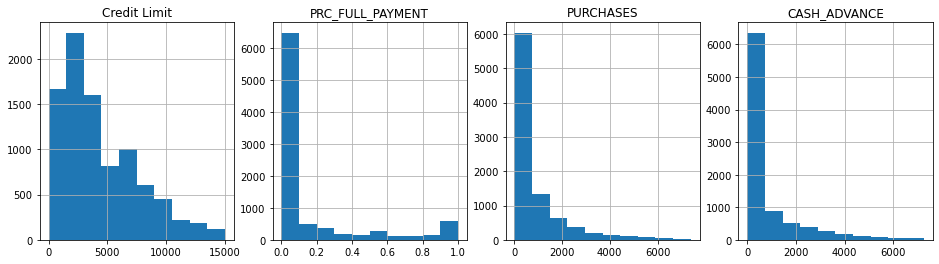

In [17]:
fig = plt.figure(figsize=(16,4))
ax=plt.subplot("141")
data["CREDIT_LIMIT"].hist()
ax.set_title("Credit Limit")
ax=plt.subplot("142")
data["PRC_FULL_PAYMENT"].hist()
ax.set_title("PRC_FULL_PAYMENT")
ax=plt.subplot("143")
data["PURCHASES"].hist()
ax.set_title("PURCHASES")
ax=plt.subplot("144")
data["CASH_ADVANCE"].hist()
ax.set_title("CASH_ADVANCE")

plt.show()

# K-mean Clustering

In [18]:
df = data[['CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'PURCHASES', 'CASH_ADVANCE']]
df.head(2)

#standardizing
st_df = (df-df.mean())/df.std()

x_train, x_test = model_selection.train_test_split(st_df, test_size=0.3, random_state=112)

print("number of all data :", len(st_df))
print("number of data in train set :", len(x_train))
print("number of data in test set :", len(x_test))

number of all data : 8950
number of data in train set : 6265
number of data in test set : 2685


In [19]:
st_df.describe()

,CREDIT_LIMIT,PRC_FULL_PAYMENT,PURCHASES,CASH_ADVANCE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-2.967211e-15,-5.537036e-15,-2.813200e-15,-2.119075e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.302013e+00,-5.255216e-01,-6.787887e-01,-5.588362e-01
25%,-8.359617e-01,-5.255216e-01,-6.632977e-01,-5.588362e-01
50%,-3.699104e-01,-5.255216e-01,-3.931395e-01,-5.588362e-01
75%,5.621923e-01,-3.712027e-02,1.969733e-01,1.628684e-01
max,3.358500e+00,2.893291e+00,5.558249e+00,4.807292e+00


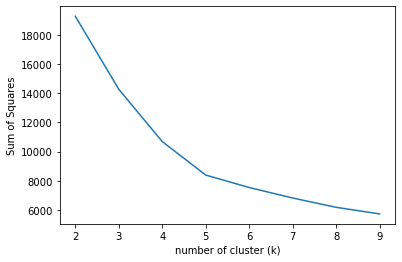

In [20]:
#elbow method
ss = []
krange = list(range(2,10))

x = x_train.values
for n in krange:
    model=cluster.KMeans(n_clusters=n, random_state=112)
    model.fit_predict(x)
    cluster_assignments = model.labels_ 
    centers = model.cluster_centers_ 
    ss.append(np.sum((x-centers[cluster_assignments])**2))
    
plt.plot(krange, ss)   
plt.xlabel("number of cluster (k)")
plt.ylabel("Sum of Squares")
plt.show()

Choose k = 5 because it is Elbow point

In [21]:
cluster = cluster.KMeans(n_clusters=5, random_state=112)
cluster.fit(x_train)

KMeans(n_clusters=5, random_state=112)

In [22]:
np.array(np.unique(cluster.labels_, return_counts=True)).T

array([[   0, 3243],
       [   1,  815],
       [   2,  986],
       [   3,  487],
       [   4,  734]])

In [23]:
x_train["cluster_k"] = cluster.labels_
x_train.tail(5)

<ipython-input-23-b84209bad59e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["cluster_k"] = cluster.labels_


,CREDIT_LIMIT,PRC_FULL_PAYMENT,PURCHASES,CASH_ADVANCE,cluster_k
684,0.562192,-0.525522,0.839523,1.399866,4
5317,-0.525261,-0.525522,-0.639363,-0.558836,0
2369,1.338945,-0.240622,0.691108,-0.558836,2
7642,-0.742751,-0.525522,-0.678789,-0.053935,0
232,0.468982,-0.525522,0.197454,0.250952,2


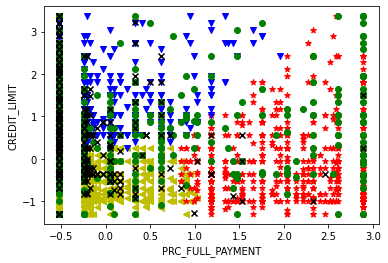

In [24]:
#plot 

colors = ["y","r","b","g","k"]
markers = ["<","*","v","o","x"]
clusters = x_train["cluster_k"].unique()
clusters.sort()

for c in clusters:
    d = x_train[x_train["cluster_k"] == c]
    plt.scatter(d['PRC_FULL_PAYMENT'], d['CREDIT_LIMIT'], marker=markers[c], color=colors[c])

plt.xlabel("PRC_FULL_PAYMENT")
plt.ylabel("CREDIT_LIMIT")

plt.show()

In [25]:
a = cluster.cluster_centers_

pd.DataFrame(a,columns=['CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'PURCHASES', 'CASH_ADVANCE'])

,CREDIT_LIMIT,PRC_FULL_PAYMENT,PURCHASES,CASH_ADVANCE
0,-0.621147,-0.399560,-0.326970,-0.252390
1,-0.105245,2.224446,0.064444,-0.497263
2,1.283628,-0.338000,-0.091329,-0.336511
3,0.725950,0.255637,2.732160,-0.320516
4,0.710603,-0.387419,-0.344281,2.344863
